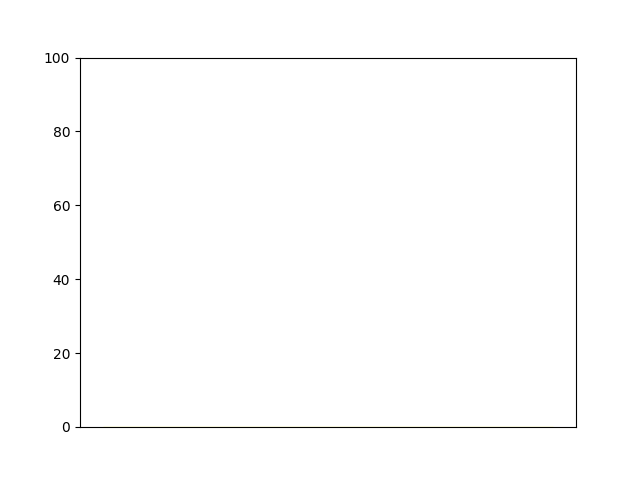

In [5]:
%matplotlib widget 

import random
import functools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

from sort_funcs import gen_bubble_sort, gen_insertion_sort, gen_merge_sort, gen_quicksort

# set bins and numbers
n = 12
hist_bins = list(range(n+1))  # edges = bins + 1
numbers = random.sample(population=list(range(20, 100)), k=n)

# set plot
fig, ax = plt.subplots()
default_color = "green"
hightlight_color = "pink"
_, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                              ec="yellow", fc=default_color, alpha=0.5)

# remove unnecessary details for cleaner look
ax.set_ylim(top=100)
ax.set_xticklabels([])         
plt.tick_params(bottom=False)  


def animate(new_heights, bar_container):
    for height, patch in zip(new_heights, bar_container.patches):
        current_height = patch.get_height()
        if current_height == 0:  # first frame
            patch.set_height(height)
        elif current_height != height:
            patch.set_height(height)
            patch.set_facecolor(hightlight_color)  # the numbers that swapped positions
        else:
            patch.set_facecolor(default_color)  # default color
    return bar_container.patches


func = functools.partial(animate, bar_container=bar_container)
func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                         interval=400,           
                                         frames=gen_bubble_sort(numbers),
                                         blit=True, 
                                         cache_frame_data=False)  # to suppress warning



plt.show()

In [ ]:
%matplotlib widget 

import random
import functools
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

from sort_funcs import gen_bubble_sort, gen_insertion_sort, gen_merge_sort, gen_quicksort

# set bins and numbers
n = 12
hist_bins = list(range(n+1))  # edges = bins + 1
numbers = random.sample(population=list(range(20, 100)), k=n)

# set plot
fig, ax = plt.subplots()
default_color = "green"
hightlight_color = "pink"
_, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                              ec="yellow", fc=default_color, alpha=0.5)

# remove unnecessary details for cleaner look
ax.set_ylim(top=100)
ax.set_xticklabels([])         
plt.tick_params(bottom=False)  


def animate(new_heights, bar_container):
    for height, patch in zip(new_heights, bar_container.patches):
        current_height = patch.get_height()
        if current_height == 0:  # first frame
            patch.set_height(height)
        elif current_height != height:
            patch.set_height(height)
            patch.set_facecolor(hightlight_color)  # the numbers that swapped positions
        else:
            patch.set_facecolor(default_color)  # default color
    return bar_container.patches


func = functools.partial(animate, bar_container=bar_container)
func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                         interval=400,           
                                         frames=gen_bubble_sort(numbers),
                                         blit=True, 
                                         cache_frame_data=False)  # to suppress warning



plt.show()



 

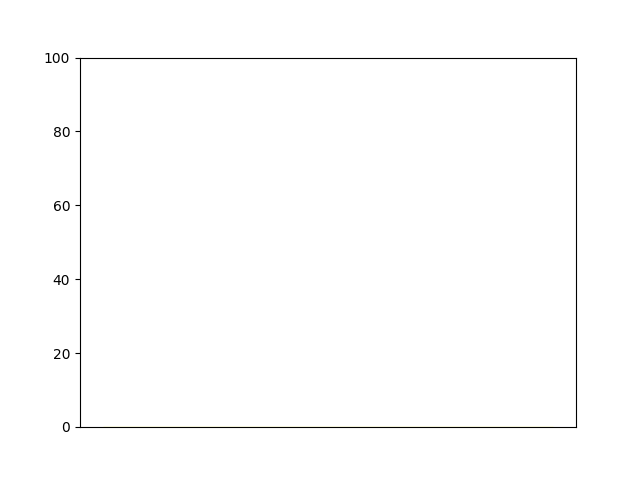

In [8]:
%matplotlib widget 

import random
import functools
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

from sort_funcs import gen_bubble_sort, gen_insertion_sort, gen_merge_sort, gen_quicksort


def animate(new_heights, bar_container):
    for height, patch in zip(new_heights, bar_container.patches):
        current_height = patch.get_height()
        if current_height == 0:  # first frame
            patch.set_height(height)
        elif current_height != height:
            patch.set_height(height)
            patch.set_facecolor("pink")  # highlight the numbers that swapped positions
        else:
            patch.set_facecolor("green")  # default color
    return bar_container.patches


def run_sorting_animation(sort_func: Callable):
    # set bins and numbers
    n = 12
    hist_bins = list(range(n+1))  # edges = bins + 1
    numbers = random.sample(population=list(range(20, 100)), k=n)

    # set plot
    fig, ax = plt.subplots()
    _, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                                ec="yellow", fc="green", alpha=0.5)

    # remove unnecessary details for cleaner look
    ax.set_ylim(top=100)
    ax.set_xticklabels([])         
    plt.tick_params(bottom=False) 
    
    func = functools.partial(animate, bar_container=bar_container)
    func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                             interval=400,           
                                             frames=sort_func(numbers),
                                             blit=True, 
                                             cache_frame_data=False)  # to suppress warning
    plt.show()



run_sorting_animation(sort_func=gen_bubble_sort)